# RUN THE MODEL
Use the following blocks to initate and run the simulation.

### 1. Set the class path
First you must set the class path to the directory containing your .py files for the agent classes as well as the model class. Then import the MainModel.MainModel class from MainModel.py

In [1]:
import sys
sys.path.append('../../src')  # Add the scripts directory to the Python path

from MainModel import MainModel

### 2. Initiate the model
Initate an instance of MainModel and 

In [2]:
steps = None#insert integer or None. 

model = MainModel(num_steps=steps)

### 3. Run the Model!

Choose between visual and non-visual model simulation. 

#### For non-visual simulation
Make a for loop that called the model's .step() function. Specify a number of itterations smaller or equal to than the num_step parameter declared in the code block above. Any higher numbers will not result in more steps taken. This is however not the case if the model was instanciated without a specified num_steps variable. 

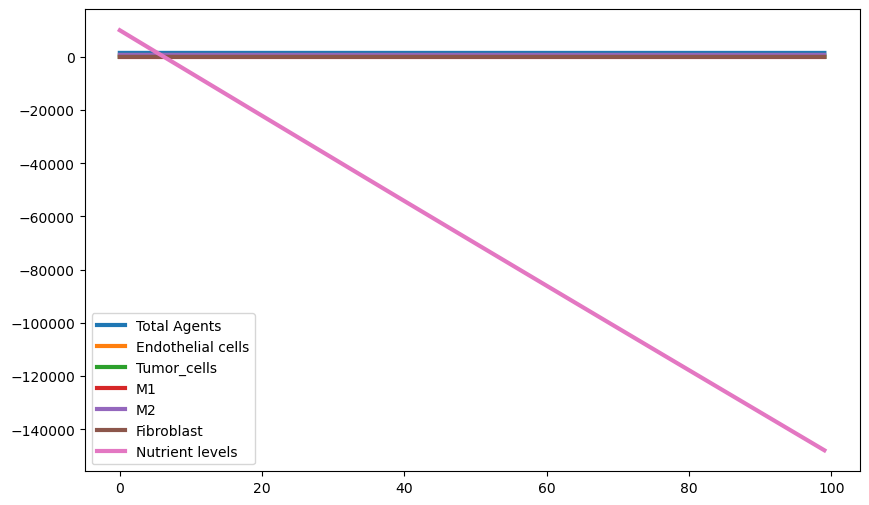

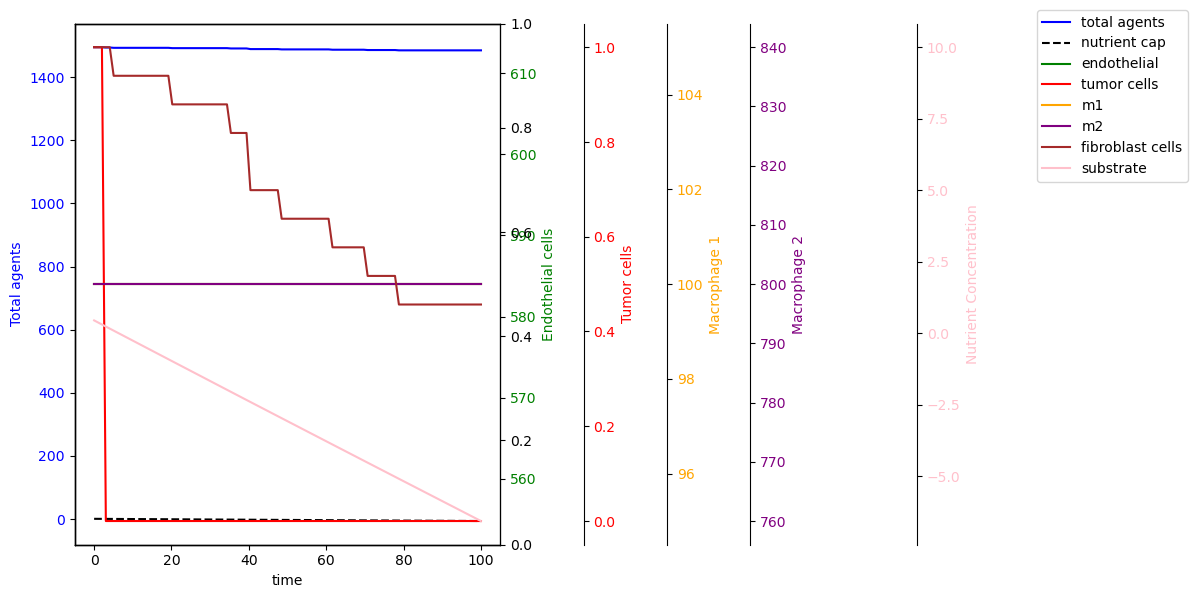

In [3]:
for i in range(100): #SPECIFY NUMBER OF STEPS IN range()
    model.step()

#COLLECTING STORED DATA
model_df = model.datacollector.get_model_vars_dataframe()
agent_df = model.datacollector.get_agent_vars_dataframe()

#model_df.head(5)

#agent_df

#DOWNLOAD DATA FILES
model_df.to_excel("model_data.xlsx", index=False)
agent_df.to_excel("agent_data.xlsx", index=False)


#PLOT DATA
model_df.plot( lw=3, figsize=(10, 6))

model.plot_data_overlap()

#### For visual simulation
The following code creates an https server that visually simulates the model. If the aim is to run a limitied number of steps throughout a simulation specify num_steps in the arguments that initate a server object. 

Note: this method instanciates a server using the MainModel class as input. It does not use an instance of MainModel which is why num_steps has to be specified under *"model_params"* rather in the MainModel call directly.

In [4]:
from MainModel import MainModel

from mesa.visualization.modules import CanvasGrid
from mesa.visualization.ModularVisualization import ModularServer

from Endothelial import Endothelial;
from Tumor_cells import Tumor_cells; 
from M1 import M1;
from M2 import M2;
from Fibroblast import Fibroblast;

def agent_portrayal(agent):
    """
    Define how agents are portrayed in the visualization.

    Args:
        agent (Agent): The agent to portray.

    Returns:
        dict: A portrayal dictionary specifying agent appearance.
"""
    portrayal = {
        "Filled": "true",   # Ensure the shape is filled
    }

    if isinstance(agent, Tumor_cells):
        portrayal["Shape"] = "circle"
        portrayal["r"] = 1
        portrayal["Color"] = "blue"
        portrayal["Layer"] = 0

        # Add a label if multiple agents are in the same cell for clarity
        cell_contents = agent.model.grid.get_cell_list_contents(agent.position)
        if len(cell_contents) > 1:
            portrayal["text"] = f"{len(cell_contents)}"
            portrayal["text_color"] = "white"

    elif isinstance(agent, Endothelial):
        portrayal["Shape"] = "circle"
        portrayal["r"] = 1
        portrayal["Color"] = "red"
        portrayal["Layer"] = 0

    elif isinstance(agent, M1):
        portrayal["Shape"] = "circle"
        portrayal["r"] = 1
        portrayal["Color"] = "green"
        portrayal["Layer"] = 0

    elif isinstance(agent, M2):
        portrayal["Shape"] = "circle"
        portrayal["r"] = 1
        portrayal["Color"] = "purple"
        portrayal["Layer"] = 0
    
    elif isinstance(agent, Fibroblast):
        portrayal["Shape"] = "circle"
        portrayal["r"] = 1
        portrayal["Color"] = "orange"
        portrayal["Layer"] = 0


    return portrayal

# Set up the visualization canvas
canvas_element = CanvasGrid(agent_portrayal, 150, 150, 1200, 1200) 

# Create the ModularServer to run the visualization
server = ModularServer(
    MainModel, 
    [canvas_element], 
    "Prostate Environment Simulation",
    model_params={"num_steps": 100}
)

server.port = 8521  # You can set a custom port
# Run the visualization server
server.launch()





Interface starting at http://127.0.0.1:8521


OSError: [Errno 48] Address already in use